Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
           ds        yhat  yhat_lower  yhat_upper
0  2014-01-31  177.677287  -30.673558  400.104406
1  2014-02-28  124.517861  -77.755091  336.557698
2  2014-03-31  219.796797    5.489655  437.730685
3  2014-04-30  238.484800   27.754475  457.629132
4  2014-05-31  122.754915  -97.317569  325.894728
5  2014-06-30  138.728644  -75.552820  344.230984
6  2014-07-31  202.592438    9.475970  417.646683
7  2014-08-31  319.896220  113.908120  534.585243
8  2014-09-30  231.378399   13.239070  436.476544
9  2014-10-31  316.810026   93.867123  521.622049
10 2014-11-30   84.933015 -127.924857  289.272990
11 2014-12-31  354.436186  167.852405  578.158436
12 2015-01-31  221.237619   24.796385  429.445512
13 2015-02-28  168.299801  -38.261250  377.403747
14 2015-03-31  264.142086   59.875702  471.617277
15 2015-04-30  282.666785   78.425552  492.766742
16 2015-05-31  165.527623  -43.181159  384.310996
17 2015-06-

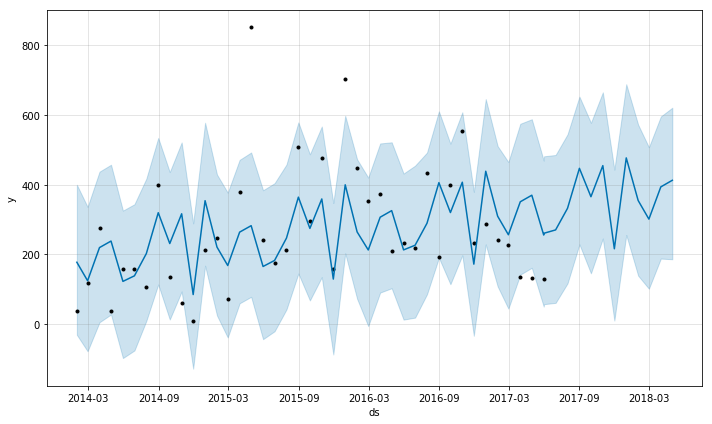

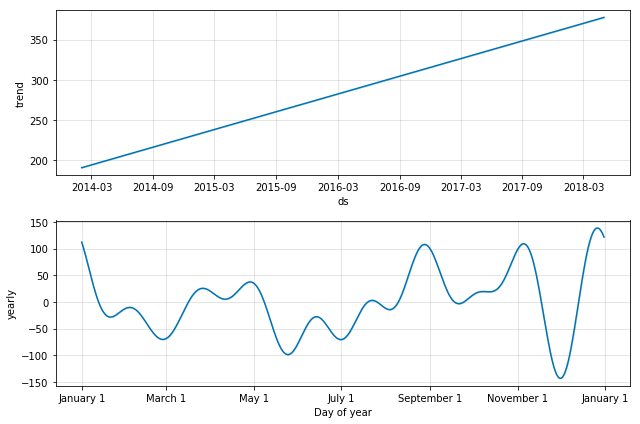

In [9]:
%matplotlib inline
import pandas as pd
import numpy as np
from fbprophet import Prophet

data = pd.read_csv('MissingMigrantsProject.csv', encoding='latin-1')
df = pd.DataFrame(data, columns = ['date','dead'])
df.rename(columns={'date': 'ds',
                   'dead': 'y'}, inplace=True)
df['ds'] = pd.to_datetime(df['ds'])
df.index = df['ds']

df = df.resample('M').sum()

df = df.reset_index()

df = df[:-7]

model = Prophet()
model.fit(df)

future_dates = model.make_future_dataframe(periods=12, freq='MS')

forecast = model.predict(future_dates)

results = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

print(results)

model.plot(forecast, uncertainty=True)

model.plot_components(forecast);
